# ML Zoomcamp 2024 Competition

## Overview

Welcome to the Retail Demand Forecasting Challenge! This competition challenges participants to forecast customer demand based on historical sales and related data from a retailer.

You will use the provided dataset with 25 months of sales data from four stores and predict the demand for products in the next month. You can find more details about the dataset here.
https://www.kaggle.com/competitions/ml-zoomcamp-2024-competition/data

## Description
Competition Objective
The goal of this competition is to develop a model that predicts customer demand for a given set of products across multiple stores. Your predictions will help optimize stock management and reduce operational inefficiencies.

## Dataset Description
The dataset consists of sales information, price changes, promotions, markdowns, and product catalog details.

You can find more details about the dataset here.
https://www.kaggle.com/competitions/ml-zoomcamp-2024-competition/data

## Evaluation
The competition uses Root Mean Squared Error (RMSE) as the evaluation metric.

# Loading Data

In [1]:
!pip install kaggle==1.5.12

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73026 sha256=673f66d2cce63cf6006258f34eabe05ba25ba6d8c321ae98e1eff3c26ff99a2d
  Stored in directory: /root/.cache/pip/wheels/70/0c/e6/79103212a102e78b8453691b905f48000219574ba7137e7207
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.6.17
    Uninstalling kaggle-1.6.17:
      Successfully uninstalled kaggle-1.6.17


In [13]:
# !mkdir -p ~/.kaggle
# !cp /content/kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [14]:
!kaggle competitions download -c ml-zoomcamp-2024-competition

 96% 207M/216M [00:01<00:00, 115MB/s]
100% 216M/216M [00:01<00:00, 121MB/s]


In [26]:
!unzip ml-zoomcamp-2024-competition.zip -d kaggle_ZC-2024_data/

Archive:  ml-zoomcamp-2024-competition.zip
  inflating: kaggle_ZC-2024_data/actual_matrix.csv  
  inflating: kaggle_ZC-2024_data/catalog.csv  
  inflating: kaggle_ZC-2024_data/discounts_history.csv  
  inflating: kaggle_ZC-2024_data/markdowns.csv  
  inflating: kaggle_ZC-2024_data/online.csv  
  inflating: kaggle_ZC-2024_data/price_history.csv  
  inflating: kaggle_ZC-2024_data/sales.csv  
  inflating: kaggle_ZC-2024_data/sample_submission.csv  
  inflating: kaggle_ZC-2024_data/stores.csv  
  inflating: kaggle_ZC-2024_data/test.csv  


In [27]:
import pandas as pd
import numpy as np

In [30]:
sales = pd.DataFrame(pd.read_csv('/content/kaggle_ZC-2024_data/sales.csv'))

In [47]:
sales.head(4)

,Unnamed: 0,date,item_id,quantity,price_base,sum_total,store_id
0,0,2023-08-04,293375605257,1.000,47.86,47.86,1
1,1,2023-08-04,a66fdf2c0ae7,3.000,49.60,148.80,1
2,2,2023-08-04,daa46ef49b7a,0.822,379.00,311.54,1
3,3,2023-08-04,a3b49c1bf758,1.000,129.00,129.00,1


In [46]:
sales.columns

Index(['Unnamed: 0', 'date', 'item_id', 'quantity', 'price_base', 'sum_total',
       'store_id'],
      dtype='object')

In [39]:
sales.date  = pd.to_datetime(sales.date)

<Axes: >

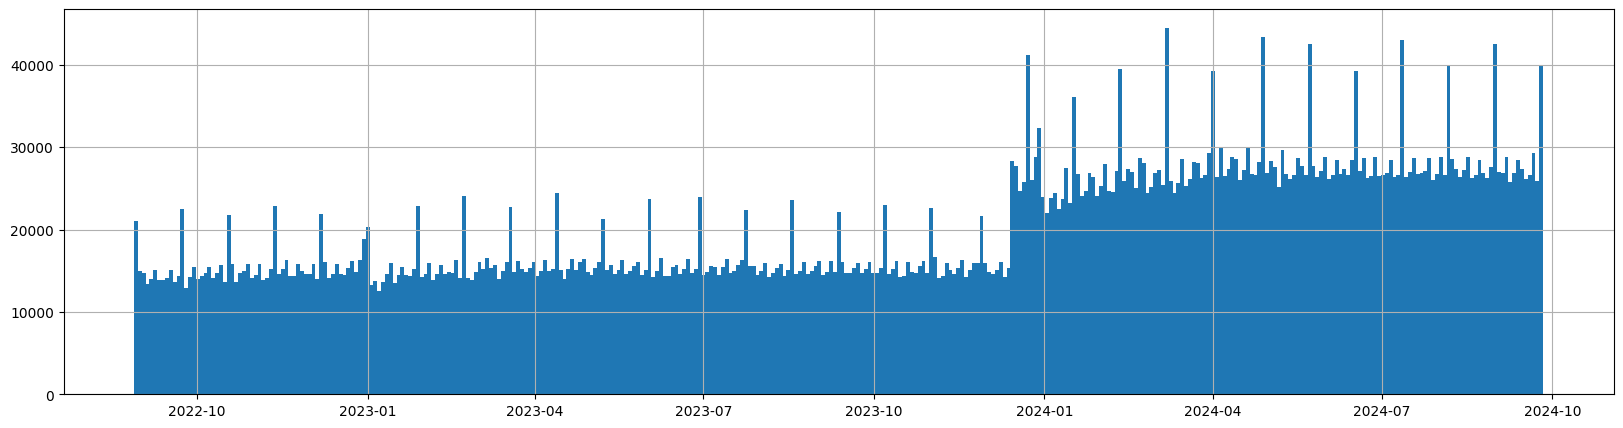

In [45]:
sales.date.hist(bins=365 , figsize=(20,5) )

In [60]:
sales.item_id.nunique()

28182

<Axes: >

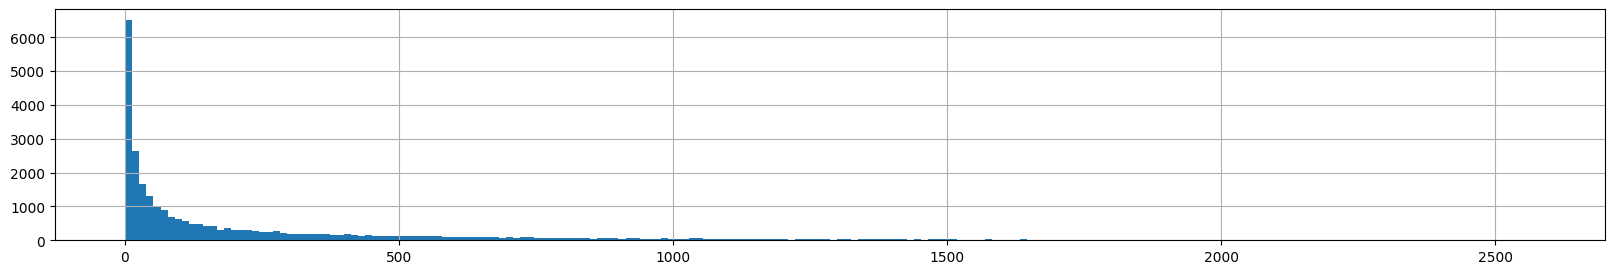

In [59]:
sales.item_id.value_counts().hist(bins=200, figsize=(20,3))

In [65]:
sales.price_base.describe().round(2)

,price_base
count,7432685.00
mean,207.58
std,337.29
min,-21676.67
25%,60.00
50%,109.90
75%,199.90
max,28999.90


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: >

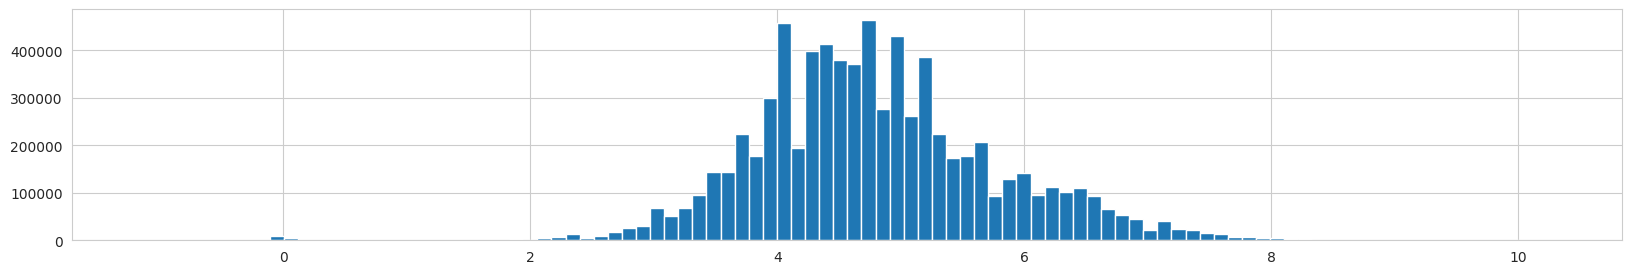

In [67]:
np.log1p(sales['price_base']).hist(bins=100, figsize=(20,3))